创建一个自编码器 Autoencoder，核心目标是学习如何将输入图像压缩到低维空间（编码），再从中重构出原图（解码）。    

自编码器可以用于如下任务：  

✅ 1. 图像压缩与重构  
	- 作用： 将28x28=784维的图像压缩成32维的表示，再恢复成784维。  
	- 用途：  
	- 减少数据存储空间  
	- 快速传输图像特征而不是原始图像  
	- 在神经网络中作为特征提取的一部分  
	

✅ 2. 无监督特征学习  
	- 作用： 自动学习图像中最重要的特征（例如笔画结构、数字形状）。  
	- 用途：  
	- 在没有标签的情况下提取有意义的特征向量  
	- 可用于后续分类任务（如逻辑回归或SVM）  
	  

✅ 3. 降噪自编码器（扩展用法）  
	- 作用： 如果训练时在输入图像加噪声，而目标仍是原图，那么它可以学会“自动去噪”。  
	- 用途：  
	- 清理受损图像  
	- 增强模型鲁棒性  
	

✅ 4. 异常检测（Anomaly Detection）  
	- 作用： 训练模型只看过“正常”数据（如MNIST中的手写数字），当看到不同于训练分布的数据（如噪声图像或错误数字）时，重构误差会显著上升。   
	- 用途：  
	- 识别“伪造数字”、“错误输入”  
	- 在工业应用中检测异常行为（如设备异常）   


### 准备数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 

In [4]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

### 创建模型

In [3]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

### 训练

In [5]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3662 - val_loss: 0.1721
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1641 - val_loss: 0.1402
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1373 - val_loss: 0.1262
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1261 - val_loss: 0.1187
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1195 - val_loss: 0.1142
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1148 - val_loss: 0.1110
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1119 - val_loss: 0.1087
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1099 - val_loss: 0.1065
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1077 - val_loss: 0.1050
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1061 - val_loss: 0.1032
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1043 - val_loss: 0.1019
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

### 评估

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


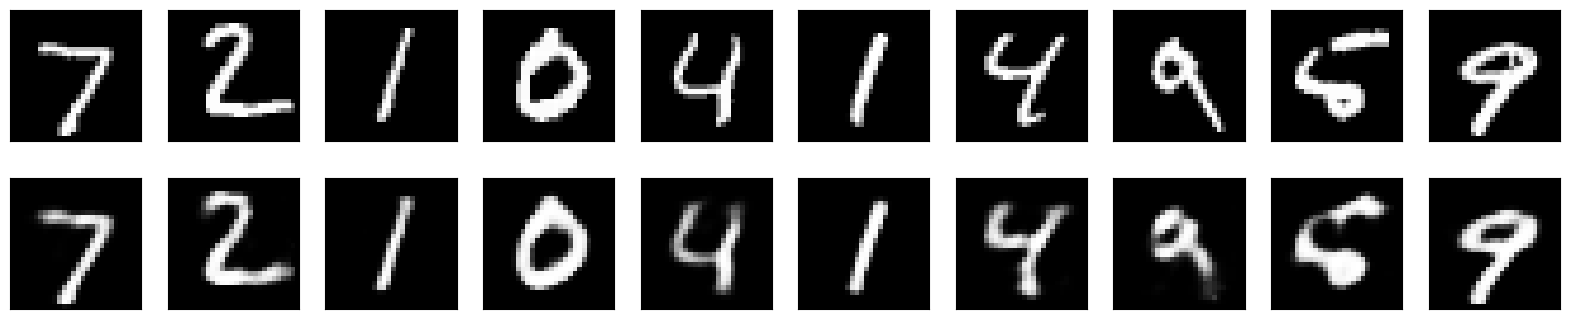

In [10]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()

### 微调

In [7]:
for layer in autoencoder.layers:
    layer.trainable = False

In [8]:
# Check trainable status of each layer
for i, layer in enumerate(autoencoder.layers):
    print(f"Layer {i}: {layer.name}, Trainable = {layer.trainable}")


Layer 0: input_layer, Trainable = False
Layer 1: dense, Trainable = False
Layer 2: dense_1, Trainable = False
Layer 3: dense_2, Trainable = False
Layer 4: dense_3, Trainable = False


In [11]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0928 - val_loss: 0.0911
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0921 - val_loss: 0.0910
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0923 - val_loss: 0.0910
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0919 - val_loss: 0.0909
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0918 - val_loss: 0.0909
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0918 - val_loss: 0.0906
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0916 - val_loss: 0.0908
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0914 - val_loss: 0.0904
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0915 - val_loss: 0.0907
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0912 - val_loss: 0.0902


### 用AE给图片降噪

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2217 - val_loss: 0.1477
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1454 - val_loss: 0.1366
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1360 - val_loss: 0.1310
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1310 - val_loss: 0.1281
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1284 - val_loss: 0.1264
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1263 - val_loss: 0.1249
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1254 - val_loss: 0.1242
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1245 - val_loss: 0.1236
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1239 - val_loss: 0.1230
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1235 - val_loss: 0.1234
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1230 - val_loss: 0.1224
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

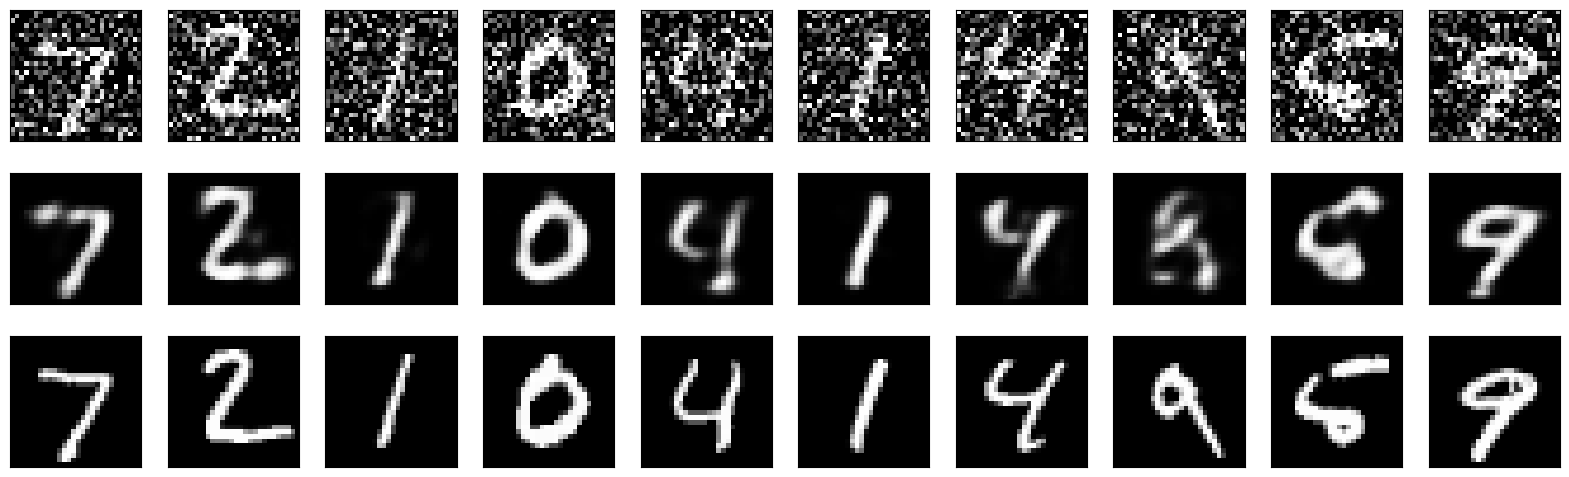

In [12]:

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
